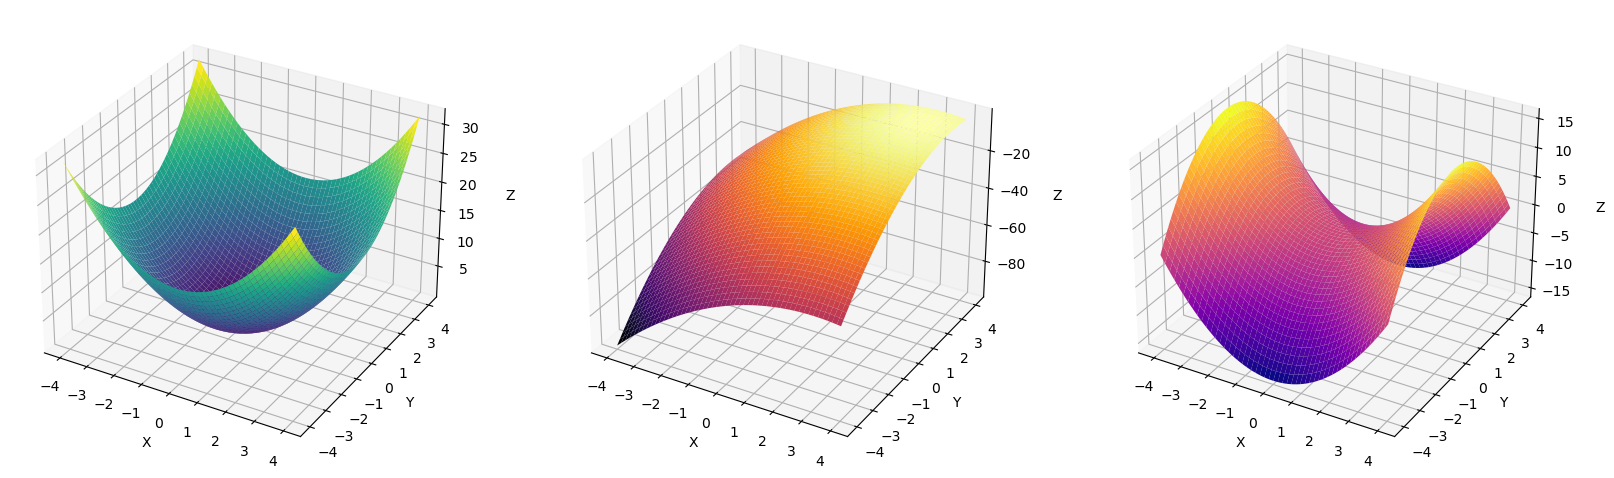

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creating grid of points
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)

# Define functions
Z_min = X**2 + Y**2
Z_max = -(X-3)**2 - (Y-3)**2
Z_saddle = X**2 - Y**2

fig = plt.figure(figsize=(20, 10))  # Increase the width of the figure

# Adjust subplot parameters: left, right, bottom, top, wspace, hspace
plt.subplots_adjust(right=0.9)  # Adjust the right space

# Plot for global minimum
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z_min, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z', labelpad=10)

# Plot for global maximum
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z_max, cmap='inferno')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z', labelpad=10)

# Plot for saddle point with annotation for z-label
ax3 = fig.add_subplot(133, projection='3d')
surf = ax3.plot_surface(X, Y, Z_saddle, cmap='plasma')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

# Manually add the z-label using text2D
fig.text(0.92, 0.525, 'Z', va='center', ha='center')

plt.show()


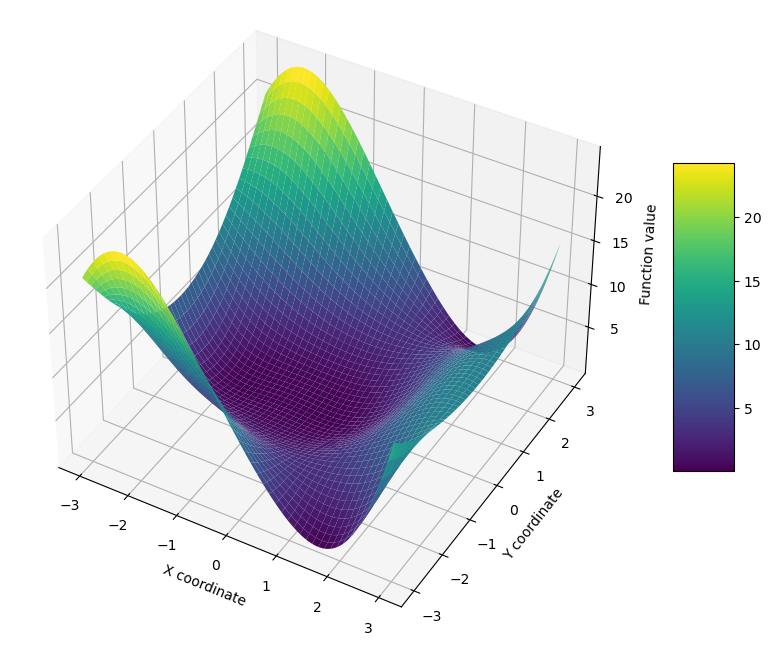

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def custom_function(x, y):
    """Custom function with one global minimum and two local minima."""
    return (x**2 + y**2) * np.sin(x) * np.cos(y) + (x**2 + y**2)

# Create a grid of points
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = custom_function(X, Y)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Function value')
ax.view_init(40, 300)  # Adjusts the viewing angle for better perception of depth

# Add a colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()


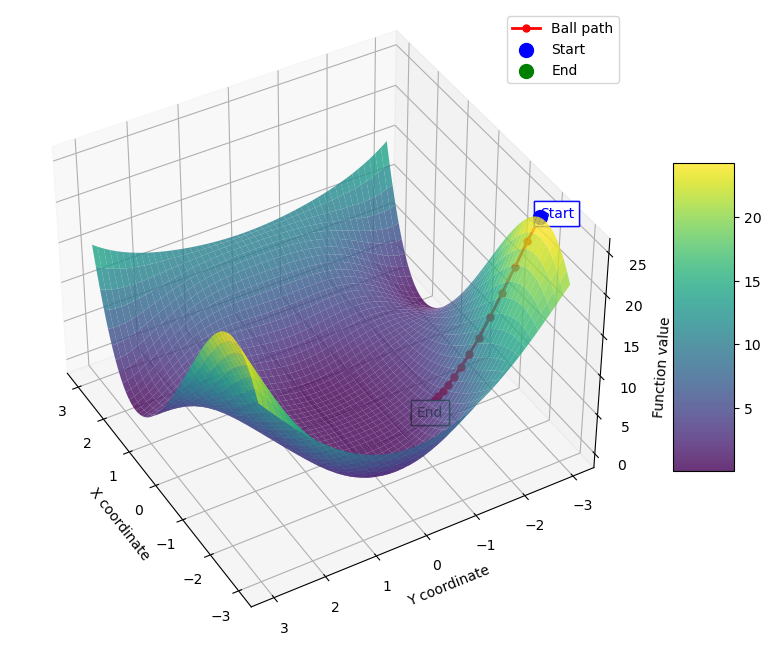

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the custom function and its gradient
def custom_function(x, y):
    """Custom function with one global minimum and two local minima."""
    return (x**2 + y**2) * np.sin(x) * np.cos(y) + (x**2 + y**2)

def custom_gradient(x, y):
    """Gradient of the custom function."""
    dfdx = (2*x * np.sin(x) * np.cos(y) + (x**2 + y**2) * np.cos(x) * np.cos(y) + 2*x * (np.sin(x) * np.cos(y) + 1))
    dfdy = (2*y * np.sin(x) * np.cos(y) + (x**2 + y**2) * np.sin(x) * (-np.sin(y)) + 2*y * (np.sin(x) * np.cos(y) + 1))
    return dfdx, dfdy

# Parameters for gradient descent
initial_learning_rate = 10**-2
num_steps = 20
x_start, y_start = -2, -3  # Starting position of the ball

# Lists to store the path
x_path = [x_start]
y_path = [y_start]

# Perform gradient descent with decaying learning rate
x, y = x_start, y_start
learning_rate = initial_learning_rate
for step in range(num_steps):
    dfdx, dfdy = custom_gradient(x, y)
    x -= learning_rate * dfdx
    y -= learning_rate * dfdy
    x_path.append(x)
    y_path.append(y)

# Create a grid of points
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = custom_function(X, Y)

# Plotting the surface and the path of the ball
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
ax.set_zlabel('Function value')
ax.view_init(40, 150)  # Adjusting the viewing angle for a better view of the path

# Plot the path of the ball
z_path = custom_function(np.array(x_path), np.array(y_path))
ax.plot(x_path, y_path, z_path, color='r', marker='o', markersize=5, linestyle='-', linewidth=2, label='Ball path')

# Highlight the starting and ending points
ax.scatter(x_path[0], y_path[0], z_path[0], color='blue', s=100, label='Start', marker='o')
ax.scatter(x_path[-1], y_path[-1], z_path[-1], color='green', s=100, label='End', marker='o')

# Annotate the starting and ending points with a background color
ax.text(x_path[0], y_path[0], z_path[0], 'Start', color='blue', bbox=dict(facecolor='white', alpha=0.9, edgecolor='blue'))
ax.text(x_path[-1], y_path[-1], z_path[-1], 'End', color='green', bbox=dict(facecolor='white', alpha=0.9, edgecolor='green'))

ax.legend()

# Add a colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()